# Lab 05 - Bài tập

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy:

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [9]:
# a)
n, p = 10, 0.25
binom.rvs(n, p)

4

In [10]:
# b)
prob_4_point = binom.pmf(4, n, p)
prob_4_point

0.14599800109863273

In [11]:
# c)
E_X = n * p
Var_X = n * p * (1 - p)
print(f'E(X) = {E_X}')
print(f'Var(X) = {Var_X}')

E(X) = 2.5
Var(X) = 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [13]:
lambda_ = 3

prob_1_calls = poisson.pmf(1, lambda_)
prob_2_calls = poisson.pmf(2, lambda_)
prob_3_calls = poisson.pmf(3, lambda_)
print("1 call: " + str(prob_1_calls))
print("2 calls: " + str(prob_2_calls))
print("3 calls: " + str(prob_3_calls))

1 call: 0.14936120510359185
2 calls: 0.22404180765538775
3 calls: 0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.
b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [14]:
# a)
mean = 500
std = np.sqrt(16)
prob_1 = 1 - norm.cdf(505, mean, std)
prob_2 = norm.cdf(505, mean, std) - norm.cdf(495, mean, std)
prob_3 = norm.cdf(495, mean, std)

print("Loại 1: " + str(prob_1))
print("Loại 2: " + str(prob_2))
print("Loại 3: " + str(prob_3))

Loại 1: 0.10564977366685535
Loại 2: 0.7887004526662893
Loại 3: 0.10564977366685535


Mean: 502.27800736961615
Std: 3.4394768201835686


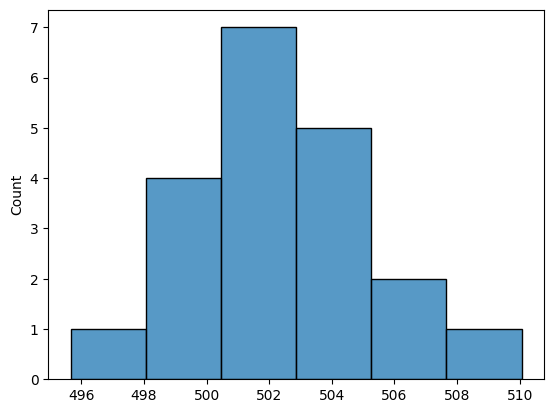

In [17]:
# b)
import seaborn as sns
n = 20
sample = norm.rvs(mean, std, size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

sns.histplot(sample)

print("Mean: " + str(sample_mean))
print("Std: " + str(sample_std))

Mean: 500.10220413488554
Std: 4.0373356184417775


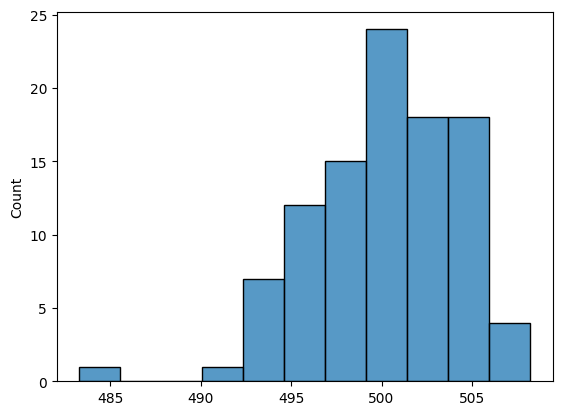

In [18]:
# c)
n = 100
sample = norm.rvs(mean, std, size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

sns.histplot(sample)

print("Mean: " + str(sample_mean))
print("Std: " + str(sample_std))

- Với n = 20 thì khối lượng trung bình sẽ lớn hơn, độ lệch chuẩn nhỏ đi.
- Với n = 100 thì khối lượng trung bình sẽ nhỏ hơn, độ lệch chuẩn cao hơn.

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [ ]:
# a)
n = 5_000
result = np.random.randint(1, 7, size=n)
prob_4_point = np.sum(result == 4) / n
prob_4_point

0.1612

In [29]:
# b)
prob_greater_4_point = np.sum(result >= 4) / n
prob_greater_4_point

0.5014

In [32]:
# c)
prob_6 = (np.sum(result == 6) / n) / prob_greater_4_point
prob_6

0.3514160351017152

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

In [ ]:
nums = binom.rvs(50, 0.7, size=5000)
# a)
print(f'Min: {nums.min()}')
print(f'Max: {nums.max()}')
print(f"Q1: {np.quantile(nums, 0.25)}")
print(f"Q2: {np.quantile(nums, 0.5)}")
print(f"Q3: {np.quantile(nums, 0.75)}")

Min: 23
Max: 46
Q1: 33.0
Q2: 35.0
Q3: 37.0


**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [47]:
# a) Hãy cho biết ý nghĩa câu lệnh sau: binom.pmf(4, 10, 0.6)
# binom.pmf(4, 10, 0.6)
# Tính giá trị hàm mật độ xác suất (Probability Mass Function - PMF) của phân phối nhị thức
# Hàm này tính xác suất để có 4 thành công trong 10 lần thử khi xác suất thành công trong mỗi lần thử là 0.6

# b) Giả sử X có phân phối nhị thức X ~ B(10, 0.6). Hãy tính các giá trị sau:
# P(X≤5),P(X≥4),P(X=5)
# X ~ B(10, 0.6). 10 lần thử và tỷ lệ thành công 0.6

# P(X<=5)
prob_less_than_5 = binom.cdf(5, 10, 0.6)
print(f"P(X<=5): {prob_less_than_5}")
# P(X>=4)
prob_greater_than_4 = 1 - binom.cdf(3, 10, 0.6)
print(f"P(X>=4): {prob_greater_than_4}")
# P(X=5)
prob_equal_5 = binom.pmf(5, 10, 0.6)
print(f"P(X=5): {prob_equal_5}")

# c. Hãy cho biết ý nghĩa câu lệnh sau: poisson.pmf(4, 3)
# tính xác suất của phân phối Poisson để có 4 sự kiện xảy ra trong một khoảng thời gian hoặc không gian nhất định, với tần suất trung bình là 3 sự kiện.

# d) Giả sử X có phân phối Poisson X ~ P(3). Hãy tính các giá trị sau:
# P(X≤5),P(X≥4),P(X=5)

# P(X≤5)
prob_less_than_5 = poisson.cdf(5, 3)
print(f"P(X<=5): {prob_less_than_5}")
# P(X≥4)
prob_greater_than_4 = 1 - poisson.cdf(3, 3)
print(f"P(X>=4): {prob_greater_than_4}")
# P(X=5)
prob_equal_5 = poisson.pmf(5, 3)
print(f"P(X=5): {prob_equal_5}")


P(X<=5): 0.3668967424000001
P(X>=4): 0.9452381183999999
P(X=5): 0.20065812479999992
P(X<=5): 0.9160820579686966
P(X>=4): 0.35276811121776874
P(X=5): 0.10081881344492458


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [ ]:
# a) Cho biết ý nghĩa của các câu lệnh sau:

# norm.cdf(2) -> Câu lệnh này tính xác suất mà một giá trị ngẫu nhiên có phân phối chuẩn (với trung bình là 0 và độ lệch chuẩn là 1) có giá trị nhỏ hơn hoặc bằng 2.

# norm.cdf(2, 1, 1) -> Câu lệnh này tính xác suất mà một giá trị ngẫu nhiên có phân phối chuẩn với trung bình = 1 và độ lệch chuẩn = 1 có giá trị nhỏ hơn hoặc bằng 2.

# norm.cdf(2, 1, 2) -> Câu lệnh này tính xác suất mà một giá trị ngẫu nhiên có phân phối chuẩn với trung bình = 1 và độ lệch chuẩn = 2 có giá trị nhỏ hơn hoặc bằng 2.


In [48]:
# b. Cho biết kết quả của câu lệnh sau: norm.ppf(norm.cdf(2))
norm.ppf(norm.cdf(2))

# -> 2.0000000000000004

2.0000000000000004

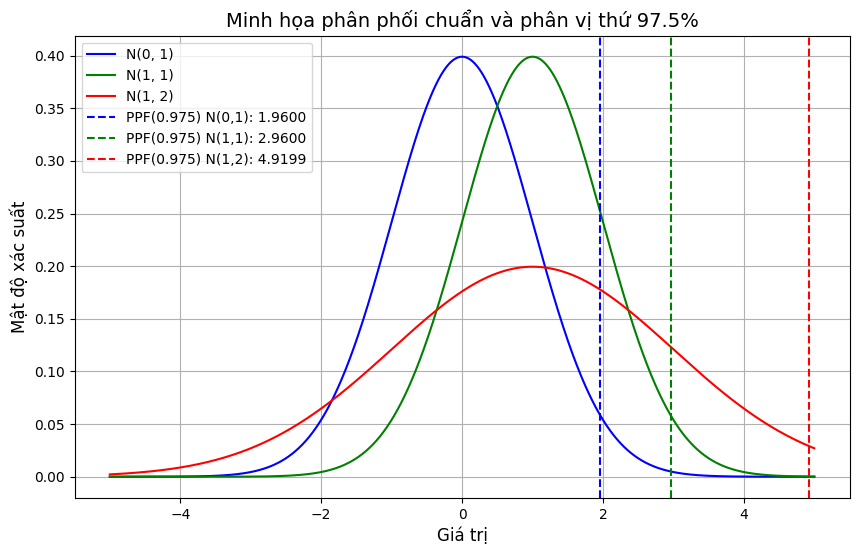

In [56]:
# c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

# norm.ppf(0.975) # -> 1.959963984540054

# norm.ppf(0.975, 1, 1) # -> 2.959963984540054

# norm.ppf(0.975, 1, 2) # -> 4.919927969080108


percentile_1 = norm.ppf(0.975)  # N(0,1)
percentile_2 = norm.ppf(0.975, 1, 1)  # N(1,1)
percentile_3 = norm.ppf(0.975, 1, 2)  # N(1,2)

x = np.linspace(-5, 5, 1000)

y1 = norm.pdf(x, 0, 1)  # N(0,1)
y2 = norm.pdf(x, 1, 1)  # N(1,1)
y3 = norm.pdf(x, 1, 2)  # N(1,2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label="N(0, 1)", color="blue")
plt.plot(x, y2, label="N(1, 1)", color="green")
plt.plot(x, y3, label="N(1, 2)", color="red")

plt.axvline(percentile_1, color="blue", linestyle="--", label=f"PPF(0.975) N(0,1): {percentile_1:.4f}")
plt.axvline(percentile_2, color="green", linestyle="--", label=f"PPF(0.975) N(1,1): {percentile_2:.4f}")
plt.axvline(percentile_3, color="red", linestyle="--", label=f"PPF(0.975) N(1,2): {percentile_3:.4f}")

plt.title("Minh họa phân phối chuẩn và phân vị thứ 97.5%", fontsize=14)
plt.xlabel("Giá trị", fontsize=12)
plt.ylabel("Mật độ xác suất", fontsize=12)
plt.legend()

plt.grid(True)
plt.show()

**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [72]:
range = (2993, 3007)
mu = 3000
sigma = 3

# Tỷ lệ sản phẩm lỗi = P(X<2993) + P(X>3007)
sample = norm.rvs(mu, sigma, size=10000)
prob = norm.cdf(2993, mu, sigma) + (1 - norm.cdf(3007, mu, sigma))
print(f"Tỷ lệ sản phẩm lỗi: {prob}")

Tỷ lệ sản phẩm lỗi: 0.01963065725729065


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm.

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

MEAN: 500.246919924263
STD: 7.349025981751402
MIN: 483.35706801334925
MAX: 514.6308146452283
IQR: 10.60509734985834
P(X>450): 0.9999999997947736


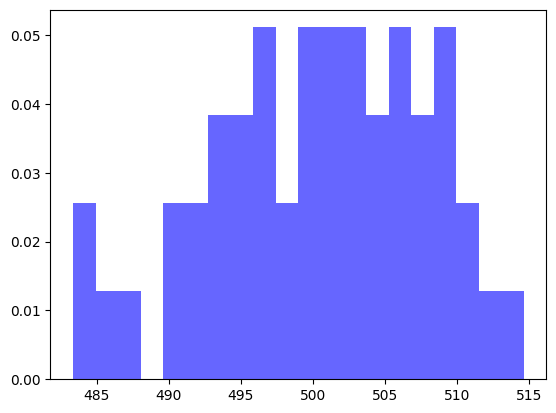

MEAN: 500.40491970985806
STD: 7.878385878170656
MIN: 482.56192591342926
MAX: 518.2879932788592
IQR: 10.93156463764467
P(X>450): 0.9999999997947736


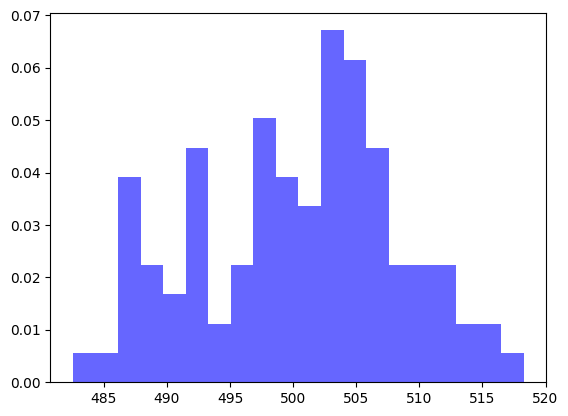

In [87]:
mean = 500
std = 8
# a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.
sample = norm.rvs(mean, std, size=50)

# b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.
print(f"MEAN: {sample.mean()}")
print(f"STD: {sample.std()}")

# c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm
print(f"MIN: {sample.min()}")
print(f"MAX: {sample.max()}")
print(f"IQR: {np.quantile(sample, 0.75) - np.quantile(sample, 0.25)}")

# d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm.
print(f"P(X>450): {1 - norm.cdf(450, mean, std)}")

# e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.
plt.hist(sample, bins=20, density=True, alpha=0.6, color='b')
plt.show()

# f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?
sample = norm.rvs(mean, std, size=100)
print(f"MEAN: {sample.mean()}")
print(f"STD: {sample.std()}")
print(f"MIN: {sample.min()}")
print(f"MAX: {sample.max()}")
print(f"IQR: {np.quantile(sample, 0.75) - np.quantile(sample, 0.25)}")
print(f"P(X>450): {1 - norm.cdf(450, mean, std)}")
plt.hist(sample, bins=20, density=True, alpha=0.6, color='b')
plt.show()


# -> độ lệch chuẩn của P(X=100) lớn hơn P(X=50), còn các chỉ số còn lại gần như tương đương nhau

**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng.

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó.

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

N: 10
VAR X: 0.20999999999999996
MEAN X: 0.3
N: 40
VAR X: 0.22749999999999998
MEAN X: 0.65
N: 90
VAR X: 0.2420987654320988
MEAN X: 0.5888888888888889
N: 160
VAR X: 0.24964843750000001
MEAN X: 0.48125
N: 250
VAR X: 0.24942400000000003
MEAN X: 0.524
N: 490
VAR X: 0.24985006247396918
MEAN X: 0.5122448979591837
N: 640
VAR X: 0.24952148437500005
MEAN X: 0.478125
N: 810
VAR X: 0.24974241731443378
MEAN X: 0.5160493827160494
N: 1000
VAR X: 0.25
MEAN X: 0.5


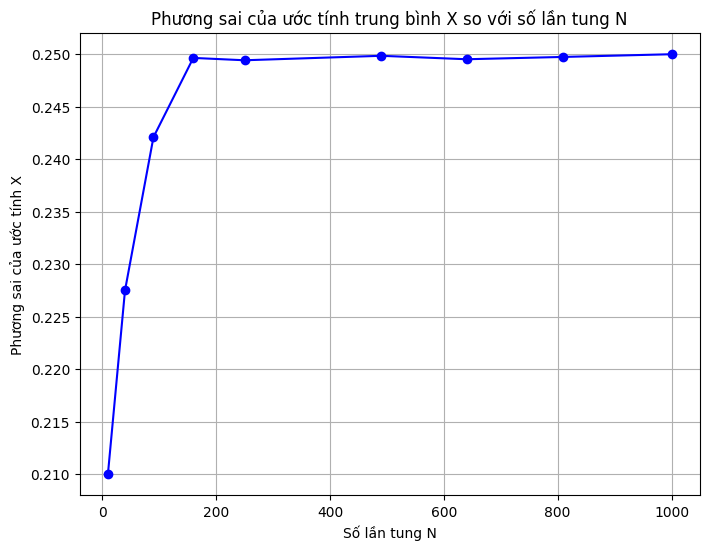

In [79]:
# 1 = head, 0 = tail
N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]
variances = []
for n in N_values:
  test = np.random.binomial(n=1, p=0.5, size=n)
  print(f"N: {n}")
  print(f"VAR X: {test.var()}")
  print(f"MEAN X: {test.mean()}")
  variances.append(test.var())

plt.figure(figsize=(8, 6))
plt.plot(N_values, variances, marker='o', linestyle='-', color='b')
plt.title('Phương sai của ước tính trung bình X so với số lần tung N')
plt.xlabel('Số lần tung N')
plt.ylabel('Phương sai của ước tính X')
plt.grid(True)
plt.show()

---